In [ ]:
# Dog Breed Identification 

"** You are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal of the competition is to create a classifier capable of determining a dog's breed from a photo. The list of breeds is as follows: **"

affenpinscher
afghan_hound
african_hunting_dog
airedale
american_staffordshire_terrier
appenzeller
australian_terrier
basenji
basset
beagle
bedlington_terrier
bernese_mountain_dog
black-and-tan_coonhound
blenheim_spaniel
bloodhound
bluetick
border_collie
border_terrier
borzoi
boston_bull
bouvier_des_flandres
boxer
brabancon_griffon
briard
brittany_spaniel
bull_mastiff
cairn
cardigan
chesapeake_bay_retriever
chihuahua
chow
clumber
cocker_spaniel
collie
curly-coated_retriever
dandie_dinmont
dhole
dingo
doberman
english_foxhound
english_setter
english_springer
entlebucher
eskimo_dog
flat-coated_retriever
french_bulldog
german_shepherd
german_short-haired_pointer
giant_schnauzer
golden_retriever
gordon_setter
great_dane
great_pyrenees
greater_swiss_mountain_dog
groenendael
ibizan_hound
irish_setter
irish_terrier
irish_water_spaniel
irish_wolfhound
italian_greyhound
japanese_spaniel
keeshond
kelpie
kerry_blue_terrier
komondor
kuvasz
labrador_retriever
lakeland_terrier
leonberg
lhasa
malamute
malinois
maltese_dog
mexican_hairless
miniature_pinscher
miniature_poodle
miniature_schnauzer
newfoundland
norfolk_terrier
norwegian_elkhound
norwich_terrier
old_english_sheepdog
otterhound
papillon
pekinese
pembroke
pomeranian
pug
redbone
rhodesian_ridgeback
rottweiler
saint_bernard
saluki
samoyed
schipperke
scotch_terrier
scottish_deerhound
sealyham_terrier
shetland_sheepdog
shih-tzu
siberian_husky
silky_terrier
soft-coated_wheaten_terrier
staffordshire_bullterrier
standard_poodle
standard_schnauzer
sussex_spaniel
tibetan_mastiff
tibetan_terrier
toy_poodle
toy_terrier
vizsla
walker_hound
weimaraner
welsh_springer_spaniel
west_highland_white_terrier
whippet
wire-haired_fox_terrier
yorkshire_terrier

# Data pre-processing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
from shutil import copyfile
import matplotlib.pyplot as plt
#%matplotlib inline

In [4]:
labels = pd.read_csv('/kaggle/input/dog-breed-identification/labels.csv')

In [5]:

labels_dict = {i:j for i,j in zip(labels['id'],labels['breed'])}
classes = set(labels_dict.values())
images = [f for f in os.listdir('/kaggle/input/dog-breed-identification/train')]

In [6]:
if  not os.path.exists('training_images'):
        os.makedirs('training_images')

if  not os.path.exists('validation_images'):
    os.makedirs('validation_images')

In [7]:
os.chdir('training_images')
for curClass in classes:    
    if  not os.path.exists(curClass):
        os.makedirs(curClass)
        #os.rmdir(curClass)

os.chdir('../validation_images')
for curClass in classes:    
    if  not os.path.exists(curClass):
        os.makedirs(curClass)

In [8]:
os.chdir('..')
count = 0

# 設定可寫入的目標資料夾
train_dir = '/kaggle/working/training_images/'
val_dir = '/kaggle/working/validation_images/'

# 建立主要資料夾 (如果不存在)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# 複製圖片
for item in images:
    # 選擇目標資料夾 (前8000張為訓練集，之後為驗證集)
    destination_directory = train_dir if count <= 7999 else val_dir
    
    # 取得圖像對應的標籤
    filekey = os.path.splitext(item)[0]
    label = labels_dict[filekey]
    
    # 建立犬種資料夾 (如果不存在)
    breed_dir = os.path.join(destination_directory, label)
    os.makedirs(breed_dir, exist_ok=True)
    
    # 複製圖片
    source_path = os.path.join('/kaggle/input/dog-breed-identification/train/', item)
    destination_path = os.path.join(breed_dir, item)
    if not os.path.exists(destination_path):
        copyfile(source_path, destination_path)
    
    count += 1

# Displaying the original image of "Afghan Hound"

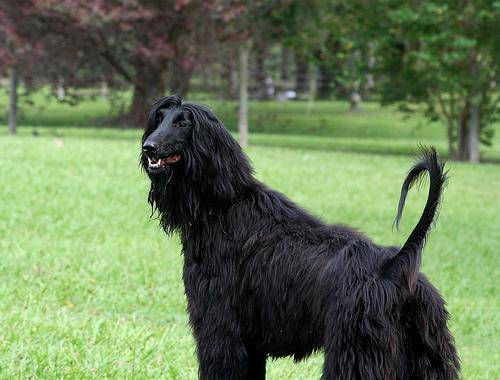

In [9]:
from tensorflow.keras.utils import load_img

img = load_img('/kaggle/working/training_images/afghan_hound/0d5a88f0ab2db8d34b533c69768135e8.jpg') 
img

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

preview_dir = '/kaggle/working/preview_images/'
os.makedirs(preview_dir, exist_ok=True)

datagen = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=0.3,
        height_shift_range=0.2,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/kaggle/working/training_images/afghan_hound/0d5a88f0ab2db8d34b533c69768135e8.jpg') 
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir= preview_dir, save_prefix='dog_breed', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

# Displaying the image after image augmentation for 3 trials for "Afghan Hound"

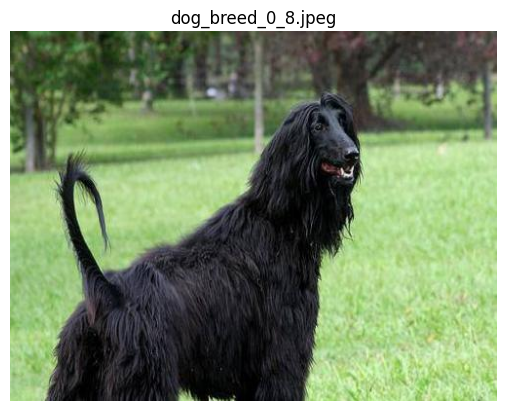

In [15]:
import os
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# 列出產生的圖片
generated_files = [f for f in os.listdir(preview_dir) if f.endswith('.jpeg')]

# 顯示第一張圖片
if generated_files:
    img_path = os.path.join(preview_dir, generated_files[0])
    img = load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(generated_files[0])
    plt.show()



# Implementing Convolution Neural Network 

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
#check class_mode in keras documentation https://keras.io/preprocessing/image/
training_set = train_datagen.flow_from_directory(
        '/kaggle/working/training_images',
        target_size=(128, 128),
        batch_size=20,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        '/kaggle/working/validation_images',
        target_size=(128, 128),
        batch_size=20,
        class_mode='categorical')



Found 8000 images belonging to 120 classes.
Found 2222 images belonging to 120 classes.


In [ ]:
from keras.layers import Dropout
clf = Sequential()
#Convolution
#32 is number of kernals of 3x3, we can use 64 128 256 etc in next layers
#input shape can be 128, 256 later
clf.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))      
#clf.add(Dropout(0.5))

clf.add(Conv2D(32,(3,3), activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
#clf.add(Dropout(0.25))

clf.add(Conv2D(64, (3, 3), activation='relu'))
clf.add(MaxPooling2D(pool_size=(2, 2)))
#clf.add(Dropout(0.10))
#Flattening
clf.add(Flatten())
        
#Adding An ANN
#lets take 128 hidden nodes in hidden layer
#clf.add(Dense(units=128,activation='relu'))
clf.add(Dense(units=64, activation='relu'))
clf.add(Dropout(0.5))
clf.add(Dense(units=120,activation='softmax'))
#stochastic gradient descent -Adam -optimizer
#loss func categorical cross entropy
#metrics = accuracy
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
from keras.callbacks import EarlyStopping
early_stopping_monitor=EarlyStopping(patience=6)

In [15]:
hist = clf.fit(
    training_set,
    epochs=50,
    validation_data=test_set,
    callbacks=[early_stopping_monitor]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746884561.761720      96 service.cc:148] XLA service 0x784430004be0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746884561.762732      96 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746884561.762756      96 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746884562.077535      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/400 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.0000e+00 - loss: 4.8171

I0000 00:00:1746884565.211663      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


120/400 ━━━━━━━━━━━━━━━━━━━━ 25s 90ms/step - accuracy: 0.0065 - loss: 4.8006

KeyboardInterrupt: 

In [ ]:
import os
import cv2
import pandas as pd

test_set = []
test_set_ids = []
test_dir = '/kaggle/input/dog-breed-identification/test/'  

for curImage in os.listdir(test_dir):
    test_set_ids.append(os.path.splitext(curImage)[0])
    curImage = cv2.imread(os.path.join(test_dir, curImage))
    test_set.append(cv2.resize(curImage, (128, 128)))


In [ ]:
test_set = np.array(test_set, np.float32)/255.0

In [ ]:
predictions= clf.predict(test_set)

In [ ]:
predictions[0].shape

In [ ]:
training_set.class_indices

In [ ]:
classes= {index:breed for breed,index in training_set.class_indices.items()}
column_names = [classes[i] for i in range(120)]
column_names

In [ ]:
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = column_names
predictions_df.insert(0,'id', test_set_ids)
#predictions_df.index = test_set_ids
predictions_df

In [ ]:
predictions_df.to_csv('interim_submission.csv',sep=",")

# Graph representation of validation loss vs  number of epochs

In [ ]:
plt.plot(hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.show()

# Graph representation of test accuracy

In [ ]:
plt.plot(hist.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'],label="Accuracy")
plt.plot(hist.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.xlabel('epochs')
plt.show()

In [ ]:
plt.plot(hist.history['loss'],label="traing loss")
plt.plot(hist.history['val_loss'], label="Validation loss")
plt.legend()
plt.xlabel('epochs')
plt.show()